In [17]:
#import libraries _Machine Leearing Library
from sklearn.cluster import KMeans
#import libraries _matrix calculation library
import pandas as pd
#import libraries _scaling if needed
from sklearn.preprocessing import MinMaxScaler
#import libraries _visulise data
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
pd.set_option('display.max_colwidth', None)
# file location setting up

In [19]:
df = pd.read_csv("detail_info.csv")
df.head()
# read data file obtained from dist_cal.py

,Location,Latitude,Longitude
0,Jambudvipa - Sri Lanka Buddhist Temple Baraipur Sarnath Varanasi\n,25.372828,83.027413
1,Dhamek Stupa Dharmapala Rd Singhpur Sarnath Varanasi\n,25.380902,83.024517
2,Garden of Spiritual Wisdom varanasi\n,25.373810,83.022420
3,Golden Temple varanasi\n,25.384084,83.025772
4,sarnath museum\n,25.379577,83.023471


Text(0, 0.5, 'Longitude')

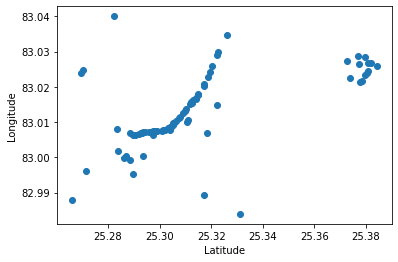

In [20]:
plt.scatter(df.Latitude, df.Longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# load data on scatter plot to visualisation 

In [21]:
# Upload KMean MAchine Learing library to calculate Euclidian distance calculation
# intilise random number of cluster
km = KMeans(n_clusters=6)
# predict by using machinne learning best fit data
y_predicted = km.fit_predict(df[['Latitude','Longitude']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       2, 3, 4, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 1, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 5, 2, 5, 1, 2, 2, 5, 2, 0, 0])

In [22]:

df['cluster']=y_predicted
df.to_csv("final.csv")
df.head()

,Location,Latitude,Longitude,cluster
0,Jambudvipa - Sri Lanka Buddhist Temple Baraipur Sarnath Varanasi\n,25.372828,83.027413,0
1,Dhamek Stupa Dharmapala Rd Singhpur Sarnath Varanasi\n,25.380902,83.024517,0
2,Garden of Spiritual Wisdom varanasi\n,25.373810,83.022420,0
3,Golden Temple varanasi\n,25.384084,83.025772,0
4,sarnath museum\n,25.379577,83.023471,0


In [23]:
centroids = km.cluster_centers_
centroids
with open('centriods.txt','w') as file:
    for center in centroids:
        file.write(str(center))
        file.write('\n')
file.close()

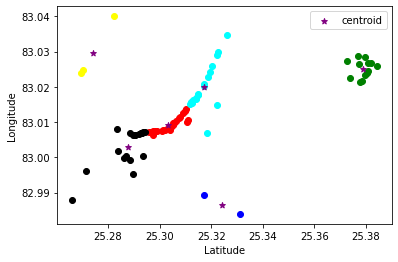

In [24]:
# cluster visulization
# datafram(df1) = from_std_data(df)[from_std_data(df) pick clusters numeber(1,2,....n)]

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

# plot each color with identification 
# plot (type of graph, scatter/histogram)(concern dataframe1,2...n latitude and longitude , color identification)

plt.scatter(df1.Latitude,df1.Longitude,color='green')
plt.scatter(df2.Latitude,df2.Longitude,color='red')
plt.scatter(df3.Latitude,df3.Longitude,color='black')
plt.scatter(df4.Latitude,df4.Longitude,color='cyan')
plt.scatter(df5.Latitude,df5.Longitude,color='blue')
plt.scatter(df6.Latitude,df6.Longitude,color='yellow')

# plot each color with identification 
# plot (type of graph, scatter/histogram)(concern dataframe1,2...n latitude and longitude )
# color identification, sand mark with special character and label)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Latitude')


# graph present...labeling to axis
plt.ylabel('Longitude')
plt.legend()


# graph save
plt.savefig('destination_path.png', format='png', dpi=1000)



In [26]:
# sum of Square of error calcultions
sse = []
k_rng = range(1,9)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAY4AAAEGCAYAAABy53LJAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAqQ0lEQVR4nO3df3xcdZ3v8dcnaWg7CRtIKV1bmklFLBZaQAKruIvNgjwEFVbQizRV1MdjI7L80sfidm/2CoVHuChddxVx2dxdV6QDXqCIgKBFF0RdRQKW0h+UIiTpDxbTAi29baBNPvePc6ZM0zPJTDInk5l5Px+Pecyc7znfme+3SeeT74/z/Zq7IyIikquqYhdARERKiwKHiIjkRYFDRETyosAhIiJ5UeAQEZG8TCp2AcbDEUcc4U1NTcUuhohISXnqqae2ufv0oekVETiampro6uoqdjFEREqKmfVEpaurSkRE8qLAISIieVHgEBGRvFTEGIeIVJa9e/eyefNm+vv7i12UkjBlyhSOOuooampqcrpegUNEys7mzZs59NBDaWpqwsyKXZwJzd3Zvn07mzdvZs6cOTnlibWrysy+ZGZrzWyNmd1pZlPM7HozW21mq8xspZnNzJL3w2a2wcxeMLMlEef/1szczI6Isw4TXwpoIvhRNoXHIpWtv7+fadOmKWjkwMyYNm1aXq2z2AKHmc0CrgCa3f14oBr4FHCTuy9w9xOBB4GvRuStBm4BzgbmAReZ2byM87OBDwG9cZW/NKSANqAH8PC5DQUPERQ08pDvv1Xcg+OTgKlmNglIAFvdfWfG+VqCb7yhTgVecPcX3f0t4AfAeRnn/wn4Spa8FaQd2D0kbXeYLiISj9gCh7tvAZYRtApeBna4+0oAM+sws01AKxEtDmAWsCnjeHOYhpmdC2xx92eG+3wzazOzLjPr6uvrG3N9JqZsDa4Kb4iJlIHXX3+d73znO3nn6+rq4oorrog819TUxLZt28ZatFi7qg4naCXMAWYCtWa2GMDd2919NkGfymVR2SPS3MwSBH9ORwWbAy9273T3Zndvnj79oDvmy0RjnukiUiqGCxwDAwNZ8zU3N/Otb30rrmIB8XZVnQm85O597r4XuBc4bcg1dwAXROTdDMzOOD4K2AocTRCInjGz7jD9aTP70wKXvUR0EPQAZkqE6SKSj/4d/dxy3C307yjMFN7vf//7LFiwgBNOOIFPf/rT9PX1ccEFF3DKKadwyimn8Otf/xqAa6+9ls9//vMsXLiQd77znfu/9JcsWcIf/vAHTjzxRK6++moee+wxWlpaWLRoEfPnz6e/v5/Pfe5zzJ8/n5NOOolHH30UgMcee4yPfvSjAGzfvp2zzjqLk046iS984QsUbMdXd4/lAfwZsJbgm8yA24DLgWMyrrkcuCci7yTgRYIgcQjwDHBcxHXdwBEjleXkk0/28rXc3ZPubuHz8mIWRmRCWLduXd55VqdW+7Vc66vvWD3mz1+zZo2/+93v9r6+Pnd33759u1900UX+y1/+0t3de3p6/Nhjj3V392uuucbf//73e39/v/f19XlDQ4O/9dZb/tJLL/lxxx23/z0fffRRTyQS/uKLL7q7+7Jly/yzn/2su7uvX7/eZ8+e7Xv27PFHH33UP/KRj7i7++WXX+5Lly51d/cHH3zQgf1lGirq3wzo8ojv1Nju43D3J8zsHuBpYB/we6ATuMPM5gKDBNOALgEIp+X+m7uf4+77zOwy4KcEs7G+6+5r4ypraWsNHyIyGisWrWDD/RsYeDPo/rnvM/fxwF8/wNxz53LBHVEdIiP7z//8Tz7xiU9wxBHB3QINDQ387Gc/Y926dfuv2blzJ2+88QYAH/nIR5g8eTKTJ0/myCOP5JVXXol831NPPXX/vRa/+tWvuPzyywE49thjSSaTPP/88wdc//jjj3Pvvffu/4zDDz98VPUZKtYbAN39GuCaIcmRPwl33wqck3H8EPDQCO/fNMYiikiFa7muhf9e9d+83v06g/sGqaqp4rDkYbRc3zLq93T3g6a4Dg4O8pvf/IapU6cedP3kyZP3v66urmbfvn2R71tbW3vAZ+QijmnJWqtKRCpaw7saaLmuhcG9g9TU1jC4d5CFSxfScHTDqN/zjDPO4K677mL79u0AvPrqq5x11ll8+9vf3n/NqlWrhn2PQw89dH+LJMrpp59OKhXcs/X888/T29vL3Llzs17z8MMP89prr42mOgdR4BCRirf2rrXU1NawcOlCamprWHv32HrGjzvuONrb2/ngBz/ICSecwJe//GW+9a1v0dXVxYIFC5g3bx633nrrsO8xbdo0PvCBD3D88cdz9dVXH3T+0ksvZWBggPnz53PhhRfyve9974CWC8A111zD448/znvf+15WrlxJY2NhZlxars2dUtbc3OzayEmkcqxfv573vOc9OV+/5ckt1DfWUzejjl2v7GLnpp3MbI5cDalsRf2bmdlT7t489FotcigiFW/WKbP2v66bUUfdjLoilmbiU1eViIjkRYFDRMpSJXTDF0q+/1YKHCJSdqZMmcL27dsVPHLg4X4cU6ZMyTmPxjhEpOwcddRRbN68mfJd4LSw0jsA5kqBQ0TKTk1NTc672Un+1FUlIiJ5UeAQKTJt/iulRl1VIkWU3vw3vY9jevNf0NKVMnGpxSFSRNr8V0qRAodIEWnzXylFChwiRaTNf6UUKXCIFJE2/5VSpMAhUkStBNtiJgn2V06GxxoYl4lMs6pEikyb/0qpUYtDRETyosAhIiJ5UeAQEZG8KHCIiEheFDhERCQvChwiIpIXBQ4REcmLAoeIiOQl1sBhZl8ys7VmtsbM7jSzKWZ2vZmtNrNVZrbSzGZmyfthM9tgZi+Y2ZKM9Jzyi4hIPGILHGY2C7gCaHb344Fq4FPATe6+wN1PBB4EvhqRtxq4BTgbmAdcZGbzwtMj5heZKLRJk5SjuLuqJgFTzWwSwdptW919Z8b5WsAj8p0KvODuL7r7W8APgPMAcsw/YfXv6OeW426hf0d/sYsiMUtv0tRD8Eua3qRJwUNKXWyBw923AMsIthZ4Gdjh7isBzKzDzDYRLNET1WKYBWzKON4cppFj/glr4483sm3dNjY+tLHYRZGYaZMmKVdxdlUdTtBKmAPMBGrNbDGAu7e7+2yCP74ui8oekba/ZZFDfsyszcy6zKyrr69vbJUpgBWLVnBD3Q3cd/F9ANz3mfu4oe4GVixaUdyCSWx6sqRrkyYpdXF2VZ0JvOTufe6+F7gXOG3INXcAF0Tk3QzMzjg+CtgacV22/Lh7p7s3u3vz9OnT8y58obVc10J9Yz1VNcE/eVVNFYclD6Pl+pYil0zikCL6rx/QJk2SXerZFE3/3ETV0iqa/rmJ1LMTs2MzzsDRC7zPzBJmZsAZwHozOybjmnOB5yLyPgkcY2ZzzOwQgkH1+wFyzD/hNLyrgZbrWhjcO0hNbQ2DewdZuHQhDUc3FLtoEoN2ogffDG3SJNFSz6Zoe6CNnh09OE7Pjh7aHmjbHzwmUlCJbT8Od3/CzO4Bngb2Ab8n2KPmDjObCwwStOYvAQin1f6bu5/j7vvM7DLgpwSzsb7r7mvDt74xKn8pWHvXWmpqazj9f53O49c/ztq71zLvE/NGziglJ1t3lKO9NyRa+8/b2b33wFGx3Xt30/7zYFSs7YG2/efTQQWgdf74/0aZe0lNShqV5uZm7+rqKnYx2PLkFuob66mbUceuV3axc9NOZjbrNpRy1ET0GEcS6B7XkkipqFpahUe0Uw2jsb6Rnh0H/0Yl65N0X9UdW5nM7Cl3bx6arjvHx9GsU2ZRN6MOgLoZdQoaZUx7iUu+GuujR78a6xvp3RHdhs2WHjcFDpEYaC9xSct1bKLjjA4SNQf+uZGoSdBxRsewQaUYtOe4SEy0l7ikB7xzGZtIH7f/vJ3eHb001jfScUbH/vTM94G3g0oxaIxDRCQmTf/cVLCxidSzqf1BpWFqMBvz1T2vHvB6aLAZK41xiIiMs9GMTWTr2mqd30r3Vd3cfv7t7Nm3h+17tuM42/ds3/966BTeuChwiIjEJN+xiZHu5YDoabuZMqfwxkWBQ6QAtAquRBluwDvKSPdyQG4zqXp39MZ6w6ACh8gYaRVcyaZ1fiudH+skWZ/EMJL1STo/1pl1DCKXrq1cZlI1TG0YseUyFhocFxmjJnSznxRGLoPpQ2dqDZWoSTB10lS279k+7PvkQoPjIjHJ1nGgVXAlX9m6tq479br9+/gMbcVMmzqNaVOnHdCieXXPq5HvX6gbBhU4CkI93JUsW8eBVsGVfGXr2jqp+6QD9vFJz7AavGaQbV/ZxravbGPwmkG6r+qmdX5r7DcMqqtqzNI93JnNxgS6T7hy6DdA4rJi0Qo23L+BgTcHGNw3SNWkKqonVzP59MncfNbNkTcKQnR3VqImMez4ShR1VcVG+7xVshRv/wZUh2laXkQKJWofH2bAN97zjWEHvvMdlM+XWhxjkgIWZzlnBCu/S7lSS0PGw7p71rHiohVUT65m4M0BHrzwQX53zO8Oui6OlXLV4ii49NdGNurhLndqa8p4SO/js3DpQpgCjb+P/m4Zz5VytcjhqEV9baRpAe1KoNlUMh5Ou/o0zr75bH70xx+x7JVl1L1eF3ndeK6UqxbHqA339aDOikqg2VQyHmadMosf/fFHtD3Qxs7anWydtTXyuvFcKVeBY9SyfT0kUdAofylgV0S62poSh5HWp5o2ddq4biGrwDFq2uOtUqVHt4belzsNtTVleKNdP2q48YtETYJvnv3NQhUxJwoco6Y93ipVttGtOvTTl+xyWfk2m2zjF9VWXdBptrlS4BiTVoLViAbDZ31tVAINisto5LLybTbZliK57eO3jXvQAAUOkbxpUFxGYyybOn363k8zddLUg9akKkbQAE3HFclbB9E3/ml0S4bTWN8YufJtVDdU6tkUVz585QEr3G7fs51ETYLbz7+9aAEjTS0OkTxpdEtGI9dNndJjIVHLoo/H7n65UOAQycHQ9Y9Bo1uSn1zXjxpp6u143iGejbqqREYwdE2q9A5/oIAh+Wmd3zpiN9NIgWE87xDPRi0OkRFoTSoZT8MFhuH2Kx9PsQYOM/uSma01szVmdqeZTTGz681stZmtMrOVZjYzS94Pm9kGM3vBzJZkpN9kZs+F7/FDMzsszjqIpIczJ+/o59LjbmHyjv4D0kUKKWosBIK7w4s5kypTbIHDzGYBVwDN7n48wXYFnwJucvcF7n4i8CDw1Yi81cAtwNnAPOAiM5sXnn4EON7dFwDPA38fVx1E4O19Nt79440cuW4bx4S7sFVnzyIyalFjIcvPX862r2ybEEED4h/jmARMNbO9BDMWt7r7zozztUDUhiCnAi+4+4sAZvYD4DxgnbuvzLjut8AnYim5SOi8RSs49v4NVL85AMDHP3Mf5/71Azx37ly444Iil07KUS5jIcUUW4vD3bcAywhuqH0Z2JH+0jezDjPbRDC2eFCLA5gFbMo43hymDfV54OGozzezNjPrMrOuvr6+0VdEKt7z17Wwo7GegXAXtoGaKl5PHsbz17cUuWQixRFnV9XhBK2EOcBMoNbMFgO4e7u7zyaYsHJZVPaItANaJmbWDuwL3+Pgi9073b3Z3ZunT58++opIxVvyrgZ+fV0L1XsHebO2huq9g/zX0oUsObqh2EUTKYo4B8fPBF5y9z533wvcC5w25Jo7gKi2/mZgdsbxUcD+RejN7GLgo0CrV8Let1JUrUDrXWsZqK3hF0sXMlBbw+K712oqrlSsOMc4eoH3mVkC2AOcAXSZ2THuvjG85lzguYi8TwLHmNkcYAvBoPoiCGZbAX8HfNDds98lI1JAF119GvU3n03HjDp2LV7Azk07R84kUqbiHON4ArgHeBp4NvysTuDGcHruauAs4EoAM5tpZg+FefcRdGH9FFgP3OXua8O3/jZwKPBIOKX31rjqIJVn6B3i6X7QWafMom5GsGVn3Yw6ZjZHziIXqQhWCT09zc3N3tXVVexiyASXAj4H7M1IqwH+A90hLpXJzJ5y9+ah6Tm3OMxsqpnNLWyxRCaOKzkwaBAeX1mEsohMZDkFDjP7GLAK+El4fKKZ3R9juUTG3cFrkQ6fLlKpcm1xXEtwU97rAO6+ircXCRUpebnt/CwikHvg2OfuO2ItiUiRpMc2spk2XgURKRG5Bo41ZrYIqDazY8zsZuC/YiyXSOzSM6gWc/DYRtohwDfHq0AiJSLXwHE5cBzwJnAnsBO4KqYyicQuvcfGSCvcfhfNqBIZKqcbAMMb7drRFgRSBlLAZwh27xuJgobIwYYNHGb2ANGr1wLg7ucWvEQiMUoRrIyZS9DQ2IZItJFaHMvC5/OBPwWWh8cXEWy1LFJSrgTeyuE6jW2IZDfsGIe7/8LdfwGc5O4XuvsD4WMR8OfjU0SRwkiR2z0ZSQoztpFt+RKRUpfrIofTzeydGRsrzQG0VrmUlFwG6Aq1AE968D29CmdPeAwaN5HSl2vg+BLwmJm9GB43AV+IpUQiMekd4XwhxzTaeTtopKVnmChwSKnLdVbVT8zsGODYMOk5d38zvmKJFF4j2affFnpMI1uQGil4iZSCXNeq+gxwIXBC+LgwTBOZ2FIpaGqCqio6rriCxL59B10yjcLfr9GYZ7pIKcm1q+qUjNdTCDZlehr4fsFLJFIoqRS0tcHuoNOo9eab4Y03aL/5Znrr6mgEOoin66iDA8c4ABJhukipG9V+HGZWD9xeKvdxaD+OCnXEEbA9Yh5VMgnd3bF/fIpgTKMXYg1SInHJth/HaLeO3Q0cM7YiicQolYoOGgC94zPS0IoChZSnnALHkDvIq4B5wN1xFUpkTFIpuPji7OcbNdIgMha5tjiWZbzeB/S4++YYyiMyNulxjYGB7Nd0aKRBZCxyXR33nPRd5O7+a3ffbGZfi7VkIqPR3r5/MDzStGnQqg4kkbHINXB8KCLt7EIWRKQghhu/SCTgm1qBSmSshg0cZvZFM3sWmGtmqzMeLwGrx6eIIjlI36+RbZZgdTV0dqq1IVIAI41x3AE8DPxvYElG+hvu/mpspRLJx6WXwq23Zg8aiYSChkgBjdRV5e7eDfwN8EbGAzNriLdoIjlIpYYPGsmkgoZIgY0UOO4In58CusLnpzKORYqrvT170DALbvRrbT1g6RGamoJjERmVYbuq3P2j4fOc8SmOSI5SqSBo9Ayza3j6fo0hS4/Q0xMcg1oiIqOQ6yKH7414HG1mI209+yUzW2tma8zsTjObYmbXhwPsq8xspZnNzJL3w2a2wcxeMLMlGemfDN9z0MwOuhVeKkA6EAwXNMzevl/jyisPnqK7e3cQeEQkb7lOx/0O8FugE/g/4esfAM+b2VlRGcxsFnAF0OzuxwPVwKeAm9x9gbufCDwIfDUibzVwC8GU33nARWY2Lzy9hmAr28dzLLuUi1QqWH9q8eLh79Uwg0suebuLqshLj4iUm1wDRzfB9rHN7n4ycCLBF/iZwNeHyTcJmBq2TBLAVnffmXG+luhN104FXnD3F939LYIgdR6Au6939w05llvKRSoFn/tc9iCQlkzC7bfDd74THA/XqtDSIyKjkmvgONbd16YP3H0dQSB5MVsGd99CsFRJL/AysMPdVwKYWYeZbSJYA+6gFgcwC9iUcbw5TMuZmbWZWZeZdfX19eWTVSaI/h393HLcLfTv6A8CwN69w2dIr3qbOW4xXKtCS4+IjEqugWODmf2LmX0wfHyHoJtqMhD5v9nMDidoJcwBZgK1ZrYYwN3b3X02wcrTl0Vlj0jLa/13d+8MW0jN06dre/RStPHHG9m2bhsbH9o4/HgGBPdqRAWCbK0KLT0iMmq5Bo7PAi8AVxHsP/5imLYXaMmS50zgJXfvc/e9wL3AaUOuuQO4ICLvZmB2xvFRwNYcyyolbsWiFdxQdwP3XXwfAPctupsb+J+s4PzoDMPdFd7REQSVTFp6RGRMcgoc7r7H3f/R3T/u7n/l7svcfbe7D7r7rizZeoH3mVnCzIxg18D14d7laecCz0XkfRI4xszmmNkhBIPq9+deLSllLde1UF8PVfuCbe2rGOAwXqeFR6Mz3HZb9tZDa2sQVJLJYNBcNwSKjFmu03E/YGaPmNnzZvZi+jFcHnd/AriHYIvZZ8PP6gRuDKfnrgbOAq4MP2OmmT0U5t1H0IX1U2A9cFd6jMXMPm5mm4H3Az82s5/mX+3ylEqlaGpqoqqqiqamJlIlepNbwxMP07LtbgapooY3GaSahTxGA68dfHEuXU6trcHYx+DgwWMgIpK3nLaONbPnCLqongL2b3Tg7iNMcZkYKmHr2FQqRVtbG7szpqkmEgk6OztpnehflJk381VXw8AAd/NJ/sDRnM4veJwPcjQv8EnuOTCf1qASiVW2rWNzDRxPuPufxVKycVAJgaOpqYmeiAHkZDJJ9zjsrx0pIiDsf04mg/GHX/86cq2pLcyknh3U8f/YRS07qWdm5jBXdfXwXVQiMmZjDRw3EtzAdy/wZjrd3Z8uZCHjUgmBo6qqiqifpZkxODhY0M9KpVK0t7fT09NDdXU1AwMDJJNJOs45h9aHHgoChVn2NaTSDjkE3nprdIVYvlxBQyRm2QJHrrOq/gxoBm4A/jF8LBs2h4yrxizTTrOlp+UzLnLppZdSVVXF4sWL97duBsItWnt6emj7l38hlW715PAHyaiDBhQ1aKSAJoL/PE3hsUhFcfeyf5x88sle7pYvX+6JRMIJ7ndxwBOJhC9fvnzMeZYvX+61tbUHXJftkQxCRryPZDLmf83slrt7wg/8BUuE6SLlBujyiO/UXLuq6oFrgNPDpF8A17n7jgLGsNhUQlcVvN2F1NvbS2NjIx0dHcMOjGcbF8lUVVWFme1vWYzEgIJ1jB1ySBAqMu8YL/KAeBMQ9S+WJFiXR6ScjHWMYwXB2lS3hUmfBk5w9yx3ZE0slRI48pVtXGQs8voCjQoM+98o+fad4O3twdIhjY1BWhG7qaqIXsKgoAFTZILIFjhG2jo27Wh3z7zDe6mZrSpIyaRoGhsbR2xx5CMB5Lz6Uz6BYQINgjcS3eLQcolSSXIdHN9jZn+ePjCzDwB74imSjJeOjg4SQ5fjGKVkMknnF79IazI58sXub9+IV2I353UQBMhMeQVMkTKQa4vjEuD74VgHwGvAxfEUScZLevwjPbU2X7W1tfzrv/5r9DhKU1P0woS5BJYJLF3TdoI1dRoJgsbEDncihZXrWlXPuPsJwAJggbufBPxlrCWTcdHa2kp3dzfLly8ftvVRW1uLmZFMJlm+fDnuzq5du7IPvmdbXLAMljJvJRjHGQyfFTSk0uTaVQWAu+/0tzdi+nIM5ZEiaW1tpbOzk+SQFkF1dTVf/OIX2bVrF4ODg3R3d+e2hIkWFxQpWznNqorMaLbJgz01JjzNqhIRyd9Y7xyPUth5nCIiUhKGHRw3szfIPm19aiwlEhGRCW3YwOHuh45XQUREpDSMpatKREQqkAJHBevf0c8tx91C/47+YhdFREqIAkcF2/jjjWxbt42ND20sdlFEpISMejpuKdF03AOtWLSCDfdvYODNAQb3DVI1qYrqydXMPXcuF9xxwchvICIVIY7puFKiWq5rob6xnqqa4MdfVVPFYcnDaLm+pcglE5FSoMBRZnLZ0a/hXQ20XNfC4N5BamprGNw7yMKlC2k4umH8CywiJUeBo4ykUina2tro6enB3YPtXNvaIoPH2rvWUlNbw8KlC6mprWHt3WvHv8AiUpI0xlFGsu3ol0wm6e7uPiBty5NbqG+sp25GHbte2cXOTTuZ2TxznEoqIqVgrBs5SQno7e3NOX3WKbP2v66bUUfdjLrYyiUi5UVdVWWksTF6H7ps6SIio6HAUUaidvRLJBJ0ZOyBkcvg+UgK8R4iUsLcPbYH8CVgLbAGuBOYAlwPrAZWASuBmVnyfhjYALwALMlIbwAeATaGz4ePVI6TTz7ZK8Xy5cs9mUy6mXkymfTly5cfcC6RSDjBwpUOeCKROOCaXN5/rO8hIqUB6PKI79TYBsfNbBbwK2Ceu+8xs7uAh4B7PdwMysyuCM9fMiRvNfA88CFgM/AkcJG7rzOzrwOvuvuNZrYkDBx/N1xZKmVwfDipVIqLL76YgYGBg85FDZ5nk88AvIiUtmLdADgJmGpmk4AEsNXf3kEQoJboZdtPBV5w9xfd/S3gB8B54bnzgNvC17cBfxVHwctJeppuVNCA7IPq+Vybz3uISGmLLXC4+xZgGdALvAzscPeVAGbWYWabCLZr/mpE9lnApozjzWEawAx3fzn8jJeBI6M+38zazKzLzLr6+voKUaWS1d7ezu7du7Oer6qqynm8QgPwIhJb4DCzwwlaB3OAmUCtmS0GcPd2D7adTQGXRWWPSMurT83dO9292d2bp0+fnl/hy8xIrYGBgYERbxhMy2UAXkTKW5xdVWcCL7l7n7vvBe4FThtyzR1A1Kp6m4HM/cyPAraGr18xs3cAhM9/LGipy1A+rYHdu3fT3t6e9XxrayudnZ0kk0nMjGQySWdnJ62trYUoqoiUgDgDRy/wPjNLmJkBZwDrzeyYjGvOBZ6LyPskcIyZzTGzQ4BPAfeH5+4HLg5fXwz8KJbSl5FsrYRsRmqhtLa20t3dzeDgIN3d3QoaIhUmzjGOJ4B7gKeBZ8PP6gRuNLM1ZrYaOAu4EsDMZprZQ2HefQRdWD8F1gN3uXt6MaUbgQ+Z2UaCWVc3xlWHcpGtlZBMJiOv13iFiAxHa1VVsPRsq8yB80Qioa4nEQG0H4dE0HiFiIyGWhwiIhJJLQ4RESkIBQ4REcmLAoeIiORFgaPAtOS4iJQ77QBYQEOnt6aX8AA0U0lEyoZaHAUUtZjgSEt4iIiUGgWOAir1JcfVzSYiuVDgKKBSXnI83c3W09OT80q5IlKZFDgKqJSXHFc3m4jkSoGjgEp5CY9S72YTkfGjJUcE0F7iInIwLTkiwyrlbjYRGV8KHAKUdjebiIwvdVWJiEgkdVWJiEhBKHCIiEheFDhERCQvChwiIpIXBQ4REcmLAoeIiORFgUNERPKiwCEiInlR4BARkbwocIiISF5iDRxm9iUzW2tma8zsTjObYmY3mdlzZrbazH5oZodlyXtlmG+tmV2VkX6Cmf3GzJ41swfM7E/irIOIiBwotsBhZrOAK4Bmdz8eqAY+BTwCHO/uC4Dngb+PyHs88NfAqcAJwEfN7Jjw9L8BS9x9PvBD4Oq46iAiIgeLu6tqEjDVzCYBCWCru690933h+d8CR0Xkew/wW3ffHV77C+Dj4bm5wOPh60eAC2IrvYiIHCS2wOHuW4BlQC/wMrDD3VcOuezzwMMR2dcAp5vZNDNLAOcAszPOnRu+/mRGukhsUiloaoKqquBZW7FLJYuzq+pw4DxgDjATqDWzxRnn24F9wEH/Bd19PfA1ghbFT4BnwmshCDZ/Y2ZPAYcCb2X5/DYz6zKzrr6+voLVSypPKgVtbdDTA+7Bc1ubgodUrji7qs4EXnL3PnffC9wLnAZgZhcDHwVaPcuGIO7+7+7+Xnc/HXgV2BimP+fuZ7n7ycCdwB+y5O9092Z3b54+fXrBKyeVo70ddu8+MG337iBdpBLFGTh6gfeZWcLMDDgDWG9mHwb+DjjX3Xdny2xmR4bPjcD5BEEiM70K+Afg1hjrIEJvb37pIuUuzjGOJ4B7gKeBZ8PP6gS+TdDF9IiZrTKzWwHMbKaZPZTxFivMbB3wAPA37v5amH6RmT0PPAdsBf4jrjqIADQ25pcuUu5inVXl7te4+7Hufry7f9rd33T3d7n7bHc/MXxcEl671d3Pycj7F+4+z91PcPefZ6R/093fHT6WZOvqGqtUKkVTUxNVVVU0NTWRUod2xerogETiwLREIkgXqUS6czxCKpWira2Nnp4e3J2enh7a2toUPCpUayt0dkIyCWbBc2dnkC5SiSymP9gnlObmZu/q6sr5+qamJnp6eg5KTyaTdHd3F7BkIiITl5k95e7NQ9PV4ojQm2XUM1u6iEglUeCI0Jhl1DNbuohIJVHgiNDR0UFiyGhoIpGgQ6OhUgD9O/q55bhb6N/RX+yiiIyKAkeE1tZWOjs7SSaTmBnJZJLOzk5aNRoqBbDxxxvZtm4bGx/aWOyiiIyKBsdFxsmKRSvYcP8GBt4cYHDfIFWTqqieXM3cc+dywR1aq1MmHg2OixRZy3Ut1DfWU1UT/LerqqnisORhtFzfUuSSieRHgUNknDS8q4GW61oY3DtITW0Ng3sHWbh0IQ1HNxS7aCJ5UeAQGUdr71pLTW0NC5cupKa2hrV3ry12kUTyNqnYBRCpJKddfRpn33w2dTPqWLB4ATs37Sx2kUTypsAhMo5mnTJr/+u6GXXUzagrYmlERkddVSIikhcFDpESpK1spZjUVSVSYtJb2aZ3JUxvZQtasVfGh1ocIiVGW9lKsSlwiJQYbWUrxabAIVJitJWtFJsCh0iJ0Va2UmwKHCIlRlvZSrFpVpVICWptVaCQ4lGLQ0RE8qLAISIieVHgEBGRvChwiIhIXhQ4REQkLxWx57iZ9QE9xS5HgRwBbCt2IQqonOpTTnWB8qpPOdUFxq8+SXefPjSxIgJHOTGzrqjN40tVOdWnnOoC5VWfcqoLFL8+6qoSEZG8KHCIiEheFDhKT2exC1Bg5VSfcqoLlFd9yqkuUOT6aIxDRETyohaHiIjkRYFDRETyosBRJGY228weNbP1ZrbWzK4M0681sy1mtip8nJNr3vDciWb22zBvl5mdWgL1mWJmvzOzZ8K8SzPONZjZI2a2MXw+vMTrc5OZPWdmq83sh2Z2WKnWJeOavzUzN7Mj4q5L3PUxs8vNbEN47uulWpfYvwfcXY8iPIB3AO8NXx8KPA/MA64F/nY0ecPjlcDZ4etzgMdKoD4G1IWva4AngPeFx18HloSvlwBfK/H6nAVMCl9/bTzqE1ddwrTZwE8JbrA9osR/Ni3Az4DJ4fGRJVyXWL8H1OIoEnd/2d2fDl+/AawHZhUgrwN/Er6uB7YWstyjLNNIed3dd4WHNeEjPWvjPOC28PVtwF8VqswjlCmW+rj7SnffF577LXBUQQseXZ64fjYA/wR8ZUharGKszxeBG939zfDaPxa04NHliasusX4PKHBMAGbWBJxE8BcDwGVhV8Z3R+qaich7FXCTmW0ClgF/H0eZ8yzTiPUxs2ozWwX8EXjE3dN5Z7j7yxD8JwOOjLXw0WVronD1yfR54OEYipxVIetiZucCW9z9mfhLHq3AP5t3A39hZk+Y2S/M7JSYiz+0XE0Uri5XEef3QNxNMT1GbKrWAU8B54fHM4BqgqDeAXw317xh2reAC8LX/wP4WanUJ7z+MOBR4Pjw+PUh518r5fpkpLcDPyScEl9qdQESBF9w9eG5bsapqyrG37U14f8fA04FXhqvn08MdYn1e2Dcfsh6RP6wawj6h7+c5XwTsCafvMCO9C97+B9gZynUZ8h11xD27wIbgHeEr98BbCjl+oTHFwO/ARKlWhdgPsFfud3hYx/QC/xpKdYnfP0TYGHGuT8A00u0LrF+D6irqkjMzIB/B9a7+zcy0t+RcdnHCf4KyilvaCvwwfD1XwIbC1nubMZYn+np2UVmNhU4E3guPH0/wRct4fOPCl74CHHVx8w+DPwdcK67746tAgeWp+B1cfdn3f1Id29y9yZgM8Eg73/HV5P9ZYrrd+0+gv8zmNm7gUOIeQXaGOsS7/fAePx1oEfkXwd/TjCAtRpYFT7OAW4Hng3T7+ftv7ZnAg8Nlzfj3FPAMwRdCSeXQH0WAL8Pr1kDfDXjfacBPyf4xf850FDi9XkB2JTxnreWal2GfEY34zerKq6fzSHA8jD9aeAvS7gusX4PaMkRERHJi7qqREQkLwocIiKSFwUOERHJiwKHiIjkRYFDRETyosAhkicz2zXyVfuvXWhmp2UcX2Jmnwlff9bMZo7i87ttnFaiFYkyqdgFEClzC4FdwH8BuPutGec+SzD/flwWohQpFAUOkQIws48B/0BwE9l2oBWYClwCDJjZYuBy4AyCQNINNAMpM9sDvJ9gZdRmd99mZs3AMndfaGbTgDuB6cDvCJaQSH/uYuCK8HOfAC5194H4ayyVTF1VIoXxK4K9EE4CfgB8xd27gVuBf3L3E939l+mL3f0eoAtoDc/tGea9rwF+Fb73/UAjgJm9B7gQ+IC7nwgMEAQskVipxSFSGEcB/zdcY+gQgpVVC+V04HwAd/+xmb0Wpp8BnAw8GSx5xFSChQdFYqXAIVIYNwPfcPf7zWwhwQ5u+drH270AU4aci1obyIDb3H3c91yRyqauKpHCqAe2hK8vzkh/g2BL0ChDz3UTtCAALshIf5ywC8rMzgbSm/r8HPiEmR0Znmsws+Qoyy+SMwUOkfwlzGxzxuPLBC2Mu83slxy4FPcDwMfNbJWZ/cWQ9/kecGt4biqwFPhm+B6ZA9xLgdPN7GmCPct7Adx9HcGA/EozWw08QrBniUistDquiIjkRS0OERHJiwKHiIjkRYFDRETyosAhIiJ5UeAQEZG8KHCIiEheFDhERCQv/x+NKsqmf7gwvAAAAABJRU5ErkJggg==
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Latitude','Longitude']])
    #     inertia calculate distnce between ezch center and node assigned to cluster
    sse.append(km.inertia_)
print(sse)

with open("error_sse_1_10__WO_norm.txt", "w") as output:
    for number in sse:
        output.write(str(number))
        output.write('\n')

[0.08710638072057676, 0.020493930588702566, 0.010368106049791975, 0.007804304143862396, 0.0055996115218638395, 0.0039129438421528955, 0.002664620134050069, 0.0018996586256270617]


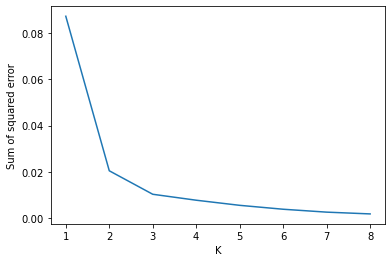

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [28]:
# clusterwise each file
df1.to_csv("cluster1.csv")
df2.to_csv("cluster2.csv")
df3.to_csv("cluster3.csv")
df4.to_csv("cluster4.csv")
df5.to_csv("cluster5.csv")
df6.to_csv("cluster6.csv")
print("add center to corrsoping cluster from cg404.txt ")
print("if SSE result suggest number of cluster is not optimmum then choose optimum number of cluster from graph")
print("repeat process from above command number in 7###Kmean start")

add center to corrsoping cluster from cg404.txt 
if SSE result suggest number of cluster is not optimmum then choose optimum number of cluster from graph
repeat process from above command number in 7###Kmean start
